In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd
from cesium import datasets
import pywt

In [5]:
eeg = datasets.fetch_andrzejak()
eeg_df = pd.DataFrame(eeg)
eeg_df.head(2)

Loaded data from cached archive.


,times,measurements,classes,archive,header
0,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[40.0, 48.0, 35.0, 5.0, -40.0, -54.0, -32.0, 6...",Z,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
1,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-56.0, -50.0, -64.0, -91.0, -135.0, -140.0, -...",Z,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...


In [6]:
# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16") #  allocate memory for longer class names
eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"
eeg_df2 = pd.DataFrame(eeg)
eeg_df2

,times,measurements,classes,archive,header
0,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[40.0, 48.0, 35.0, 5.0, -40.0, -54.0, -32.0, 6...",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
1,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-56.0, -50.0, -64.0, -91.0, -135.0, -140.0, -...",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
2,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-37.0, -22.0, -17.0, -24.0, -31.0, -20.0, -5....",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
3,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-31.0, -43.0, -39.0, -39.0, -9.0, -5.0, 18.0,...",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
4,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[14.0, 26.0, 32.0, 25.0, 16.0, 8.0, 8.0, 12.0,...",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
5,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-87.0, -89.0, -73.0, -69.0, -51.0, -48.0, -51...",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
6,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-2.0, 20.0, 42.0, 48.0, 27.0, 11.0, 9.0, 48.0...",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
7,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-31.0, -16.0, 10.0, 28.0, 31.0, 8.0, -21.0, -...",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
8,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[8.0, 17.0, 29.0, 46.0, 50.0, 44.0, 28.0, 19.0...",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...
9,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-41.0, -38.0, -31.0, -25.0, -32.0, -27.0, -29...",Normal,/home/frankl1/.local/datasets/andrzejak/andrze...,/home/frankl1/.local/datasets/andrzejak/andrze...


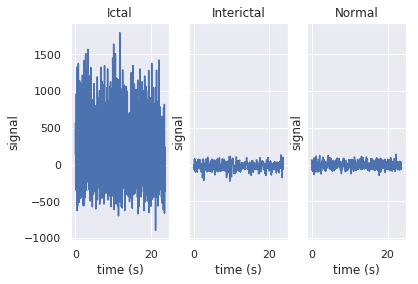

In [7]:
fig, ax = plt.subplots(1, len(np.unique(eeg["classes"])), sharey=True)
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][0]
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)